In [2]:
import platform
if platform.system() == 'Linux':
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/gellmann.ipynb'
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/ptr.ipynb'
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/states.ipynb'
else:
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/gellmann.ipynb'
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/ptr.ipynb'
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/states.ipynb'

## Trace distance discord


### Hellinger discord (https://arxiv.org/abs/1510.06995)
For a qubit-qudit system with ($d_{a}=2$), for $Tr(\gamma_{j}\gamma_{k})=d\delta_{j,k}$, and for
\begin{equation}
\sqrt{\rho} = \frac{1}{\sqrt{d_{a}d_{b}}}\left(t_{0}\mathbb{I}_{a}\otimes\mathbb{I}_{b}+\vec{x}\cdot\vec{\sigma}\otimes\mathbb{I}_{b}+\mathbb{I}_{a}\otimes\vec{y}\cdot\vec{\gamma}+\sum_{j=1}^{d_{a}^{2}-1}\sum_{k=1}^{d_{b}^{2}-1}T_{j,k}\sigma_{j}\otimes\Gamma_{k}\right)
\end{equation}
we have
\begin{equation}
D_{he}(\rho)=2-2\sqrt{t_{0}^{2}+||\vec{y}||^{2}+k_{\max}},
\end{equation}
with $k_{\max}$ being the largest eigenvalue of $K=\vec{x}\vec{x}^{T}+TT^{T}$. To get $D_{he}(\rho)\in[0,1]$ we divide the expression above by its maximum value $2-2\sqrt{d_{a}}$.

In [48]:
def hellinger(da,db,rho):
    M = mat_sqrt(da*db,rho)
    A = ptraceB(da,db,M)
    bva = bloch_vector(da,A)/sqrt(2*db)
    B = ptraceA(da,db,M)
    bvb = bloch_vector(db,B)/2
    cm = corr_mat(da,db,M)/2
    ev = eVals(da**2-1, bva*bva.T+cm*cm.T)
    return (1-sqrt((trace(da,A)/sqrt(2*db))**2+(bvb.norm())**2+max(ev)))/(1-1/sqrt(da))

In [50]:
#hellinger(2,2,werner(1))

### Mutual information
Is a quatifier for the total correlations in a quantum states defined as:
\begin{equation}
I(\rho_{ab}) = S(\rho_{a}) + S(\rho_{b}) - S(\rho_{ab}).
\end{equation}

In [64]:
def mutual_info(da,db,rho):
    rhoa = ptraceB(da, db, rho)
    Sa = von_neumann(da,rhoa)
    rhob = ptraceA(da, db, rho)
    Sb = von_neumann(db,rhob)
    S = von_neumann(da*db,rho) 
    return Sa+Sb-S

## Zurek's discord for 2 qubits


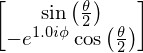

In [5]:
th, ph = symbols("theta phi")
psi1 = Matrix([[cos(th/2)],[exp(1j*ph)*sin(th/2)]])
psi2 = Matrix([[sin(th/2)],[-exp(1j*ph)*cos(th/2)]])
psi2

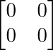

In [14]:
P1 = Matrix([[cos(th/2)**2,exp(-1j*ph)*sin(th/2)*cos(th/2)],[exp(1j*ph)*sin(th/2)*cos(th/2),sin(th/2)**2]])
P2 = Matrix([[sin(th/2)**2,-exp(-1j*ph)*sin(th/2)*cos(th/2)],[-exp(1j*ph)*sin(th/2)*cos(th/2),cos(th/2)**2]])
simplify(P1*P2)

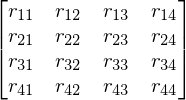

In [16]:
r11,r12,r13,r14,r21,r22,r23,r24,r31,r32,r33,r34,r41,r42,r43,r44 = symbols("r11 r12 r13 r14 r21 r22 r23 r24 r31 r32 r33 r34 r41 r42 r43 r44")
rho = Matrix([[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]])
rho

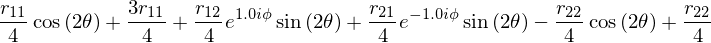

In [20]:
rhoMb = tp(Pauli(0),P1)*rho*tp(Pauli(0),P1) + tp(Pauli(0),P2)*rho*tp(Pauli(0),P2)
simplify(rhoMb[0,0])